In [1]:
import pygris
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import pandas as pd
from geopy.distance import great_circle


In [2]:
# Paths to the CSV files
alert_file_path = "/Users/alexandernez/Desktop/Github/Epymorph_vignettes/scratch/Kayode/ALERT_sensors_all_by_ID.csv"

# Load the CSV files
alert_df = pd.read_csv(alert_file_path)
alert_df = alert_df[alert_df["Dev. Type"] == "Precip."]

alert_df.head()

,Station Name,Device ID,Dev. Type,Installed,Latitude DD,Longitude DD,Elevation,Station Location
0,Mt. Union,1000,Precip.,8/16/1982,34.41507,-112.40478,7975,"Top of Mt. Union, 10 mi. SSE of Prescott"
6,Humboldt Mountain,1200,Precip.,7/14/1981,33.98075,-111.79794,5205,13 mi. NE of the Town of Cave Creek
11,Harquahala Mountain,1500,Precip.,2/10/1994,33.81214,-113.34667,5680,"Top of Harquahala Mtn., 36 mi. WSW of Wickenberg"
12,Yarnell Hill,1600,Precip.,7/13/1981,34.20593,-112.74888,5110,"2 mi. S of Yarnell, Yavapai County"
13,Towers Mountain,1700,Precip.,5/1/1992,34.23406,-112.36786,7625,"3 mi. NW of Crown King, Yavapai County"


In [3]:
# Paths to the CSV files
prcp_file_path = "/Users/alexandernez/Desktop/Github/Epymorph_vignettes/scratch/Kayode/PRCP_WITHOUT_HOTSPOT.csv"

# Load the CSV files
prcp_df = pd.read_csv(prcp_file_path)

prcp_df.head()

,zcta,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V1088,V1089,V1090,V1091,V1092,V1093,V1094,V1095,V1096,cluster
0,85006,0.208570,0.208570,0.208570,0.208570,0.208570,0.208570,0.208570,0.208570,0.208570,...,0.566640,0.567380,0.695265,0.695265,0.695265,0.695265,0.561625,0.561625,0.637930,2
1,85007,0.205460,0.205460,0.205460,0.205460,0.205460,0.205460,0.205460,0.205460,0.205460,...,0.575073,0.576060,0.699633,0.699633,0.699633,0.699633,0.563033,0.563033,0.637473,2
2,85008,0.261703,0.261703,0.261703,0.261703,0.261703,0.261703,0.261703,0.261703,0.261703,...,0.500130,0.500147,0.626287,0.627230,0.627230,0.627230,0.502943,0.502943,0.592987,2
3,85009,0.176600,0.176600,0.176600,0.176600,0.176600,0.176600,0.176600,0.176600,0.176600,...,0.625164,0.626318,0.753758,0.753758,0.753758,0.753758,0.621013,0.621013,0.707220,2
4,85012,0.207473,0.207473,0.207473,0.207473,0.207473,0.207473,0.207473,0.207473,0.207473,...,0.620693,0.621680,0.750560,0.750560,0.750560,0.750560,0.613193,0.613193,0.699313,2


In [4]:
# List of zip codes
WNV_zipcode = [
    "85003",
    "85007",
    "85012",
    "85014",
    "85018",
    "85020",
    "85021",
    "85027",
    "85032",
    "85033",
    "85035",
    "85040",
    "85042",
    "85050",
    "85054",
    "85083",
    "85086",
    "85120",
    "85142",
    "85201",
    "85203",
    "85206",
    "85208",
    "85210",
    "85213",
    "85225",
    "85226",
    "85248",
    "85250",
    "85255",
    "85257",
    "85259",
    "85266",
    "85281",
    "85283",
    "85286",
    "85297",
    "85301",
    "85303",
    "85306",
    "85310",
    "85321",
    "85322",
    "85323",
    "85331",
    "85333",
    "85337",
    "85338",
    "85339",
    "85340",
    "85342",
    "85343",
    "85354",
    "85373",
    "85375",
    "85381",
    "85382",
    "85387",
    "85019",
    "85022",
    "85024",
    "85028",
    "85029",
    "85031",
    "85034",
    "85037",
    "85041",
    "85043",
    "85045",
    "85048",
    "85051",
    "85355",
    "85361",
    "85363",
    "85374",
    "85377",
    "85379",
    "85383",
    "85388",
    "85390",
    "85392",
    "85395",
    "85545",
    "85335",
    "85351",
    "85353",
    "85053",
    "85085",
    "85087",
    "85139",
    "85202",
    "85204",
    "85205",
    "85207",
    "85209",
    "85212",
    "85215",
    "85224",
    "85233",
    "85234",
    "85249",
    "85251",
    "85254",
    "85256",
    "85258",
    "85260",
    "85262",
    "85264",
    "85268",
    "85282",
    "85284",
    "85295",
    "85296",
    "85298",
    "85302",
    "85304",
    "85305",
    "85308",
    "85309",
    "85320",
    "85004",
    "85006",
    "85009",
    "85013",
    "85015",
    "85016",
    "85017",
    "85008",
    "85044",
    "85253",
    "85307",
    "85326",
    "85396",
    "85023",
    "85263",
    "85345",
]

zcta_gdf = pygris.zctas(year=2021, cache=True)

filtered_zcta_gdf = zcta_gdf[zcta_gdf["ZCTA5CE20"].isin(WNV_zipcode)]
filtered_zcta_gdf = filtered_zcta_gdf[
    ["ZCTA5CE20", "INTPTLAT20", "INTPTLON20", "geometry"]
]
filtered_zcta_gdf

,ZCTA5CE20,INTPTLAT20,INTPTLON20,geometry
17098,85225,+33.3178283,-111.8305406,"POLYGON ((-111.85913 33.32081, -111.85913 33.3..."
17099,85266,+33.7623670,-111.9190911,"POLYGON ((-111.97816 33.73812, -111.97813 33.7..."
17100,85085,+33.7526141,-112.0901571,"POLYGON ((-112.13525 33.79816, -112.13502 33.7..."
17101,85204,+33.3957198,-111.7866076,"POLYGON ((-111.82487 33.37971, -111.82484 33.3..."
17102,85310,+33.7009773,-112.1580840,"POLYGON ((-112.22048 33.68792, -112.22045 33.6..."
...,...,...,...,...
18457,85021,+33.5610610,-112.0949244,"POLYGON ((-112.11724 33.56866, -112.11723 33.5..."
18458,85019,+33.5115340,-112.1433194,"POLYGON ((-112.15169 33.51018, -112.15169 33.5..."
18468,85388,+33.6042129,-112.4316184,"POLYGON ((-112.47009 33.58361, -112.47008 33.5..."
18475,85375,+33.6713826,-112.3571868,"POLYGON ((-112.40401 33.68047, -112.40385 33.6..."


In [5]:
filtered_zcta_gdf["ZCTA5CE20"] = filtered_zcta_gdf["ZCTA5CE20"].astype(str)
prcp_df["zcta"] = prcp_df["zcta"].astype(str)

WVN_df = pd.merge(
    filtered_zcta_gdf, prcp_df, left_on="ZCTA5CE20", right_on="zcta", how="inner"
)
WVN_df.head()

,ZCTA5CE20,INTPTLAT20,INTPTLON20,geometry,zcta,V1,V2,V3,V4,V5,...,V1088,V1089,V1090,V1091,V1092,V1093,V1094,V1095,V1096,cluster
0,85225,+33.3178283,-111.8305406,"POLYGON ((-111.85913 33.32081, -111.85913 33.3...",85225,0.328960,0.328960,0.328960,0.328960,0.323818,...,0.482137,0.487367,0.632043,0.632043,0.632043,0.632043,0.523393,0.523375,0.584653,2
1,85266,+33.7623670,-111.9190911,"POLYGON ((-111.97816 33.73812, -111.97813 33.7...",85266,0.273602,0.273602,0.273602,0.273602,0.273602,...,0.772267,0.772267,1.023116,1.023116,1.023116,1.023116,0.898200,0.898200,1.118996,2
2,85085,+33.7526141,-112.0901571,"POLYGON ((-112.13525 33.79816, -112.13502 33.7...",85085,0.214576,0.214576,0.214576,0.214576,0.211569,...,0.741847,0.741847,0.932118,0.932118,0.932118,0.932118,0.809829,0.808191,0.947144,2
3,85310,+33.7009773,-112.1580840,"POLYGON ((-112.22048 33.68792, -112.22045 33.6...",85310,0.242907,0.242907,0.242907,0.242907,0.242907,...,0.703077,0.703117,0.914627,0.914627,0.914627,0.914627,0.796530,0.796530,0.950670,2
4,85257,+33.4632123,-111.9137623,"POLYGON ((-111.96097 33.47492, -111.96096 33.4...",85257,0.324789,0.324789,0.324789,0.324789,0.324789,...,0.517149,0.518043,0.641997,0.642360,0.642360,0.642360,0.517669,0.517669,0.617874,2


I just want to move these columns to the front of the dataframe in results
result.update({
'Alert Latitude': closest_alert['Latitude DD'],
'Alert Longitude': closest_alert['Longitude DD'],
'Distance (km)': closest_distance,
'Station Name': closest_alert['Station Name'],
'Device ID': closest_alert['Device ID'],
'Dev. Type': closest_alert['Dev. Type'],
'Installed': closest_alert['Installed'],
'Elevation': closest_alert['Elevation'],
'Station Location': closest_alert['Station Location']
})


In [6]:
from geopy.distance import great_circle

# Assuming WVN_df and alert_df are already loaded dataframes
WVN_df["INTPTLAT20"] = WVN_df["INTPTLAT20"].astype(float)
WVN_df["INTPTLON20"] = WVN_df["INTPTLON20"].astype(float)
alert_df["Latitude DD"] = alert_df["Latitude DD"].astype(float)
alert_df["Longitude DD"] = alert_df["Longitude DD"].astype(float)


# Define a function to calculate the distance between two points using the Haversine formula
def calculate_distance(lat1, lon1, lat2, lon2):
    point1 = (lat1, lon1)
    point2 = (lat2, lon2)
    return great_circle(point1, point2).kilometers


# Initialize an empty list to store the results
results = []

# Iterate through the rows of WVN_df
for wvn_idx, wvn_row in WVN_df.iterrows():
    wvn_point = (wvn_row["INTPTLAT20"], wvn_row["INTPTLON20"])
    closest_distance = float("inf")
    closest_alert = None

    # Find the closest alert location
    for alert_idx, alert_row in alert_df.iterrows():
        alert_point = (alert_row["Latitude DD"], alert_row["Longitude DD"])
        distance = calculate_distance(
            wvn_point[0], wvn_point[1], alert_point[0], alert_point[1]
        )

        if distance < closest_distance:
            closest_distance = distance
            closest_alert = alert_row

    if closest_alert is not None:
        result = wvn_row.to_dict()
        result.update(
            {
                "Alert Latitude": closest_alert["Latitude DD"],
                "Alert Longitude": closest_alert["Longitude DD"],
                "Distance (km)": closest_distance,
                "Station Name": closest_alert["Station Name"],
                "Device ID": closest_alert["Device ID"],
                "Dev. Type": closest_alert["Dev. Type"],
                "Installed": closest_alert["Installed"],
                "Elevation": closest_alert["Elevation"],
                "Station Location": closest_alert["Station Location"],
            }
        )
        results.append(result)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)
# List of columns to move to the front
cols_to_move = [
    "Alert Latitude",
    "Alert Longitude",
    "Distance (km)",
    "Station Name",
    "Device ID",
    "Dev. Type",
    "Installed",
    "Elevation",
    "Station Location",
]

# Create a new list of columns with the specified columns at the front
new_columns = cols_to_move + [
    col for col in results_df.columns if col not in cols_to_move
]

# Reorder the DataFrame columns
results_df = results_df[new_columns]

# Save the reordered DataFrame
results_df.to_csv("results_reordered.csv", index=False)
print("Reordered results saved to 'results_reordered.csv'")

# Display the reordered DataFrame
results_df

# Save the final dataframe
results_df.to_csv("final_results.csv", index=False)
print("results saved to 'results.csv'")

# Display the final DataFrame
results_df


Reordered results saved to 'results_reordered.csv'
results saved to 'results.csv'


,Alert Latitude,Alert Longitude,Distance (km),Station Name,Device ID,Dev. Type,Installed,Elevation,Station Location,ZCTA5CE20,...,V1088,V1089,V1090,V1091,V1092,V1093,V1094,V1095,V1096,cluster
0,33.30387,-111.84606,2.118682,Chandler Blvd. @ Arizona Ave.,32000,Precip.,7/25/1996,1215,1/4 mile W of Chandler Blvd. and AZ Ave.,85225,...,0.482137,0.487367,0.632043,0.632043,0.632043,0.632043,0.523393,0.523375,0.584653,2
1,33.74115,-111.89814,3.052527,Rawhide Wash,61000,Precip.,7/22/1999,2230,1/3 mile west of Pima Rd. on Dynamite Blvd.,85266,...,0.772267,0.772267,1.023116,1.023116,1.023116,1.023116,0.898200,0.898200,1.118996,2
2,33.76926,-112.09881,2.016392,Sonoran Wash,65900,Precip.,10/13/2015,1580,1.75 miles east of Loop 303 @ I-17,85085,...,0.741847,0.741847,0.932118,0.932118,0.932118,0.932118,0.809829,0.808191,0.947144,2
3,33.67721,-112.15397,2.670076,Adobe Dam,65000,Precip.,10/25/1982,1400,1/4 mi. South of Deer Valley Rd. & 43rd Ave.,85310,...,0.703077,0.703117,0.914627,0.914627,0.914627,0.914627,0.796530,0.796530,0.950670,2
4,33.47020,-111.91739,0.846735,El Dorado Park,56600,Precip.,6/27/2017,1220,0.3 mi. N of McDowell Rd. on Miller Rd.,85257,...,0.517149,0.518043,0.641997,0.642360,0.642360,0.642360,0.517669,0.517669,0.617874,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,33.49595,-112.18675,2.543906,GCU Golf Course,6000,Precip.,8/17/1989,1110,Indian School Rd. at 59th Ave.,85033,...,0.596803,0.596897,0.752027,0.752027,0.752027,0.752027,0.657423,0.657423,0.762217,2
105,33.57293,-112.10445,1.587681,ACDC @ Cave Creek,12000,Precip.,3/11/1997,1230,Mountain View Rd. near 23rd Ave.,85021,...,0.707815,0.707900,0.865000,0.865000,0.865000,0.865000,0.736745,0.736745,0.902885,2
106,33.50988,-112.11053,3.045547,Camelback Rd. @ 24th Ave.,6800,Precip.,10/8/2015,1135,24th Ave. north of Camelback Road,85019,...,0.707440,0.707560,0.850005,0.850005,0.850005,0.850005,0.725370,0.725370,0.866610,2
107,33.58656,-112.47702,4.640746,McMicken Dam South,86500,Precip.,2/13/2002,1360,1/2 mi. N of the alignments of Peoria and 195t...,85388,...,0.510133,0.510133,0.671313,0.671313,0.671313,0.671313,0.560840,0.560840,0.725003,2


In [7]:
# List of columns to move to the front
cols_to_move = [
    "Alert Latitude",
    "Alert Longitude",
    "Distance (km)",
    "Station Name",
    "Device ID",
    "Dev. Type",
    "Installed",
    "Elevation",
    "Station Location",
]

# Create a new list of columns with the specified columns at the front
new_columns = cols_to_move + [
    col for col in results_df.columns if col not in cols_to_move
]

# Reorder the DataFrame columns
results_df = results_df[new_columns]

# Save the reordered DataFrame
results_df.to_csv("results_reordered.csv", index=False)
print("Reordered results saved to 'results_reordered.csv'")

# Display the reordered DataFrame
results_df


Reordered results saved to 'results_reordered.csv'


,Alert Latitude,Alert Longitude,Distance (km),Station Name,Device ID,Dev. Type,Installed,Elevation,Station Location,ZCTA5CE20,...,V1088,V1089,V1090,V1091,V1092,V1093,V1094,V1095,V1096,cluster
0,33.30387,-111.84606,2.118682,Chandler Blvd. @ Arizona Ave.,32000,Precip.,7/25/1996,1215,1/4 mile W of Chandler Blvd. and AZ Ave.,85225,...,0.482137,0.487367,0.632043,0.632043,0.632043,0.632043,0.523393,0.523375,0.584653,2
1,33.74115,-111.89814,3.052527,Rawhide Wash,61000,Precip.,7/22/1999,2230,1/3 mile west of Pima Rd. on Dynamite Blvd.,85266,...,0.772267,0.772267,1.023116,1.023116,1.023116,1.023116,0.898200,0.898200,1.118996,2
2,33.76926,-112.09881,2.016392,Sonoran Wash,65900,Precip.,10/13/2015,1580,1.75 miles east of Loop 303 @ I-17,85085,...,0.741847,0.741847,0.932118,0.932118,0.932118,0.932118,0.809829,0.808191,0.947144,2
3,33.67721,-112.15397,2.670076,Adobe Dam,65000,Precip.,10/25/1982,1400,1/4 mi. South of Deer Valley Rd. & 43rd Ave.,85310,...,0.703077,0.703117,0.914627,0.914627,0.914627,0.914627,0.796530,0.796530,0.950670,2
4,33.47020,-111.91739,0.846735,El Dorado Park,56600,Precip.,6/27/2017,1220,0.3 mi. N of McDowell Rd. on Miller Rd.,85257,...,0.517149,0.518043,0.641997,0.642360,0.642360,0.642360,0.517669,0.517669,0.617874,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,33.49595,-112.18675,2.543906,GCU Golf Course,6000,Precip.,8/17/1989,1110,Indian School Rd. at 59th Ave.,85033,...,0.596803,0.596897,0.752027,0.752027,0.752027,0.752027,0.657423,0.657423,0.762217,2
105,33.57293,-112.10445,1.587681,ACDC @ Cave Creek,12000,Precip.,3/11/1997,1230,Mountain View Rd. near 23rd Ave.,85021,...,0.707815,0.707900,0.865000,0.865000,0.865000,0.865000,0.736745,0.736745,0.902885,2
106,33.50988,-112.11053,3.045547,Camelback Rd. @ 24th Ave.,6800,Precip.,10/8/2015,1135,24th Ave. north of Camelback Road,85019,...,0.707440,0.707560,0.850005,0.850005,0.850005,0.850005,0.725370,0.725370,0.866610,2
107,33.58656,-112.47702,4.640746,McMicken Dam South,86500,Precip.,2/13/2002,1360,1/2 mi. N of the alignments of Peoria and 195t...,85388,...,0.510133,0.510133,0.671313,0.671313,0.671313,0.671313,0.560840,0.560840,0.725003,2


In [8]:
# Assuming filtered_zcta_gdf and prcp_df are already loaded dataframes
filtered_zcta_gdf = filtered_zcta_gdf[["ZCTA5CE20"]]  # Keep only the relevant column
prcp_df = prcp_df[["zcta"]]  # Keep only the relevant column

# Merge the dataframes on the common column
merged_df = pd.merge(
    filtered_zcta_gdf, prcp_df, left_on="ZCTA5CE20", right_on="zcta", how="inner"
)

# Merge the alert data with the merged ZCTA and prcp data
final_df = pd.merge(
    results_df, merged_df, left_on="ZCTA5CE20", right_on="ZCTA5CE20", how="left"
)

# Save the final dataframe
final_df.to_csv("final_results.csv", index=False)
print("Final results saved to 'final_results.csv'")

# Display the final DataFrame
final_df


Final results saved to 'final_results.csv'


,Alert Latitude,Alert Longitude,Distance (km),Station Name,Device ID,Dev. Type,Installed,Elevation,Station Location,ZCTA5CE20,...,V1089,V1090,V1091,V1092,V1093,V1094,V1095,V1096,cluster,zcta_y
0,33.30387,-111.84606,2.118682,Chandler Blvd. @ Arizona Ave.,32000,Precip.,7/25/1996,1215,1/4 mile W of Chandler Blvd. and AZ Ave.,85225,...,0.487367,0.632043,0.632043,0.632043,0.632043,0.523393,0.523375,0.584653,2,85225
1,33.74115,-111.89814,3.052527,Rawhide Wash,61000,Precip.,7/22/1999,2230,1/3 mile west of Pima Rd. on Dynamite Blvd.,85266,...,0.772267,1.023116,1.023116,1.023116,1.023116,0.898200,0.898200,1.118996,2,85266
2,33.76926,-112.09881,2.016392,Sonoran Wash,65900,Precip.,10/13/2015,1580,1.75 miles east of Loop 303 @ I-17,85085,...,0.741847,0.932118,0.932118,0.932118,0.932118,0.809829,0.808191,0.947144,2,85085
3,33.67721,-112.15397,2.670076,Adobe Dam,65000,Precip.,10/25/1982,1400,1/4 mi. South of Deer Valley Rd. & 43rd Ave.,85310,...,0.703117,0.914627,0.914627,0.914627,0.914627,0.796530,0.796530,0.950670,2,85310
4,33.47020,-111.91739,0.846735,El Dorado Park,56600,Precip.,6/27/2017,1220,0.3 mi. N of McDowell Rd. on Miller Rd.,85257,...,0.518043,0.641997,0.642360,0.642360,0.642360,0.517669,0.517669,0.617874,2,85257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,33.49595,-112.18675,2.543906,GCU Golf Course,6000,Precip.,8/17/1989,1110,Indian School Rd. at 59th Ave.,85033,...,0.596897,0.752027,0.752027,0.752027,0.752027,0.657423,0.657423,0.762217,2,85033
105,33.57293,-112.10445,1.587681,ACDC @ Cave Creek,12000,Precip.,3/11/1997,1230,Mountain View Rd. near 23rd Ave.,85021,...,0.707900,0.865000,0.865000,0.865000,0.865000,0.736745,0.736745,0.902885,2,85021
106,33.50988,-112.11053,3.045547,Camelback Rd. @ 24th Ave.,6800,Precip.,10/8/2015,1135,24th Ave. north of Camelback Road,85019,...,0.707560,0.850005,0.850005,0.850005,0.850005,0.725370,0.725370,0.866610,2,85019
107,33.58656,-112.47702,4.640746,McMicken Dam South,86500,Precip.,2/13/2002,1360,1/2 mi. N of the alignments of Peoria and 195t...,85388,...,0.510133,0.671313,0.671313,0.671313,0.671313,0.560840,0.560840,0.725003,2,85388


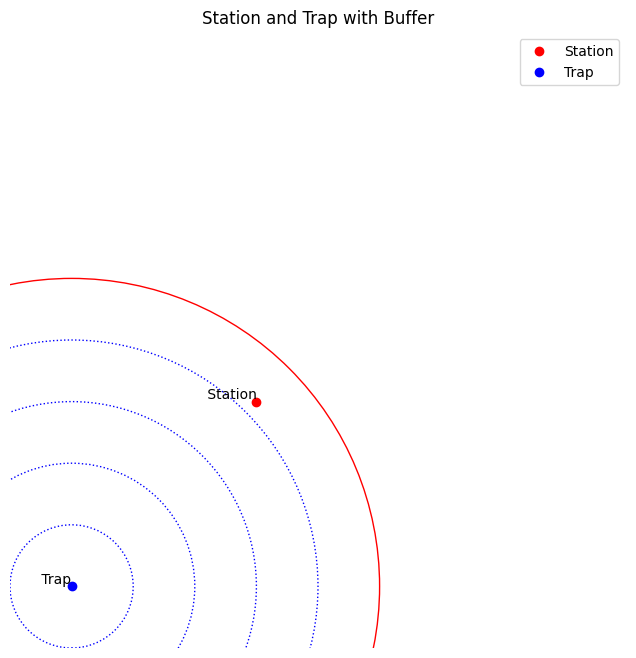

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Coordinates for the Station and Trap
station = (4, 4)
trap = (1, 1)

# Initial buffer radius and increment step
initial_radius = 1
increment_step = 1


# Function to check if the buffer reaches the Station
def has_reached_station(trap, station, radius):
    distance = np.sqrt((trap[0] - station[0]) ** 2 + (trap[1] - station[1]) ** 2)
    return distance <= radius


# Plot the points and buffer incrementally
plt.figure(figsize=(8, 8))
plt.plot(*station, "ro", label="Station")
plt.plot(*trap, "bo", label="Trap")
plt.text(
    station[0],
    station[1],
    " Station",
    verticalalignment="bottom",
    horizontalalignment="right",
)
plt.text(
    trap[0], trap[1], " Trap", verticalalignment="bottom", horizontalalignment="right"
)

radius = initial_radius
while not has_reached_station(trap, station, radius):
    circle = plt.Circle(trap, radius, color="b", fill=False, linestyle="dotted")
    plt.gca().add_patch(circle)
    radius += increment_step

# Add the final buffer circle that reaches the Station
final_circle = plt.Circle(trap, radius, color="r", fill=False, linestyle="-")
plt.gca().add_patch(final_circle)

# Plot settings
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.gca().set_aspect("equal", adjustable="box")
plt.legend()
plt.title("Station and Trap with Buffer")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.axis("off")

plt.show()

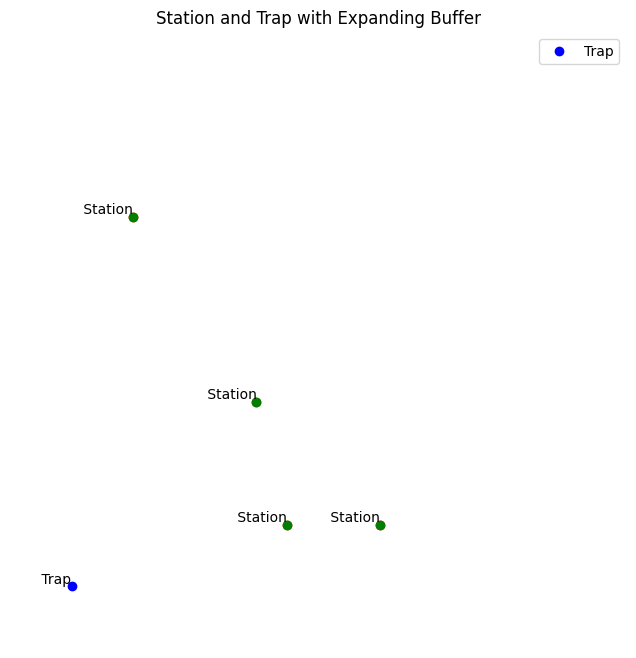

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation, PillowWriter

# Coordinates for the Stations and Trap
stations = [(4, 4), (4.5, 2), (2, 7), (6, 2)]
trap = (1, 1)

# Initial buffer radius and increment step
initial_radius = 1
increment_step = 0.1

# Setting up the plot
fig, ax = plt.subplots(figsize=(8, 8))
for station in stations:
    ax.plot(*station, "ro")
    ax.text(
        station[0],
        station[1],
        " Station",
        verticalalignment="bottom",
        horizontalalignment="right",
    )
ax.plot(*trap, "bo", label="Trap")
ax.text(
    trap[0], trap[1], " Trap", verticalalignment="bottom", horizontalalignment="right"
)

# Plot settings
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_aspect("equal", adjustable="box")
ax.legend()
ax.set_title("Station and Trap with Expanding Buffer")

ax.axis("off")

# Initial radius
radius = initial_radius

# List to store the current circle
current_circle = None
reached_any_station = False


# Function to check if the buffer reaches any station
def check_reached_station(trap, stations, radius):
    for station in stations:
        distance = np.sqrt((trap[0] - station[0]) ** 2 + (trap[1] - station[1]) ** 2)
        if distance <= radius:
            return True, station
    return False, None


# Function to update the animation
def update(frame):
    global radius, current_circle, stations, reached_any_station

    if current_circle:
        current_circle.remove()  # Remove the previous circle

    current_circle = plt.Circle(trap, radius, color="b", fill=False, linestyle="dotted")
    ax.add_patch(current_circle)
    radius += increment_step

    reached, station = check_reached_station(trap, stations, radius)
    if reached:
        ax.plot(*station, "go")  # Mark the reached station
        ax.text(
            station[0],
            station[1],
            " ",
            verticalalignment="top",
            horizontalalignment="left",
            color="green",
        )
        stations.remove(station)  # Remove the reached station from the list
        reached_any_station = True

    if reached_any_station:
        nearby_reached, nearby_station = check_reached_station(
            trap, stations, radius + 0.6
        )
        if not nearby_reached:
            ani.event_source.stop()
            return  # Stop updating


# Create animation
ani = FuncAnimation(fig, update, frames=np.arange(0, 200), repeat=False)

# Save the animation as a GIF
ani.save("buffer_animation.gif", writer=PillowWriter(fps=10))
plt.axis("off")

plt.show()
